In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Dados/processed/bicicletas.csv')

df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [3]:
df.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


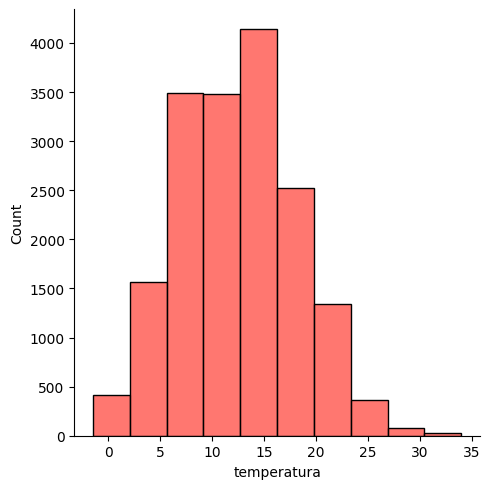

In [4]:
sns.displot(df, x='temperatura', bins=10, color='#FF4940')
plt.show()

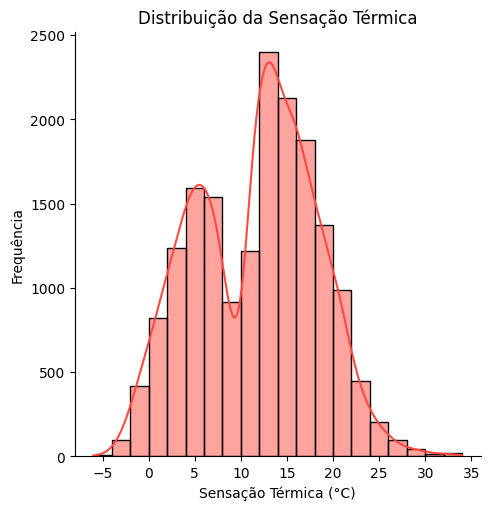

In [5]:
sns.displot(df, x='sensacao_termica', bins=20, kde=True, color='#FF4940')
plt.title("Distribuição da Sensação Térmica")
plt.xlabel("Sensação Térmica (°C)")
plt.ylabel("Frequência")
plt.show()


### 📊 Histograma
- O histograma é um gráfico que representa a distribuição de uma variável numérica contínua, agrupando os dados em intervalos (bins) e exibindo a frequência de ocorrências em cada um.

- No gráfico abaixo, foi analisada a coluna sensacao_termica, permitindo visualizar em quais faixas de temperatura houve maior concentração de dados. Isso ajuda a entender a tendência central e dispersão dos valores.

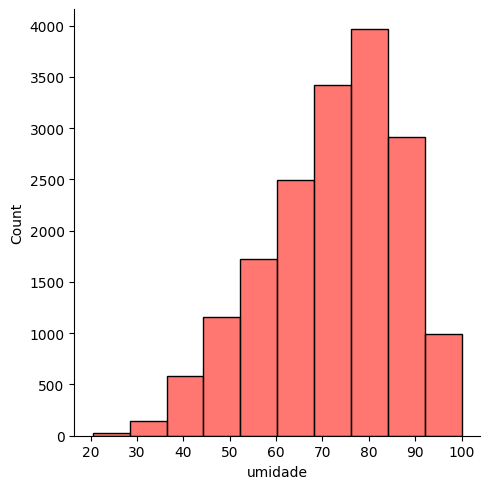

In [7]:
sns.displot(df, x='umidade', bins=10, color='#FF4940')
plt.show()

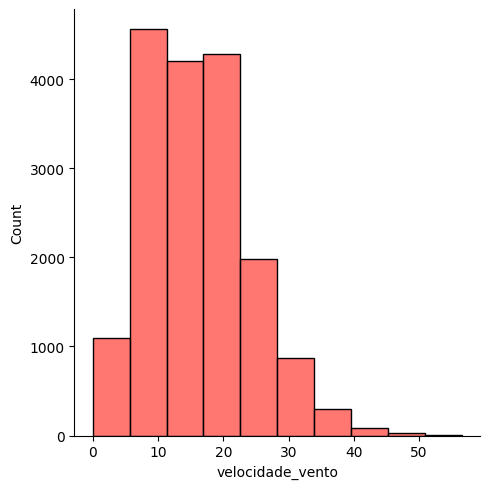

In [8]:
sns.displot(df, x='velocidade_vento', bins=10, color='#FF4940')
plt.show()

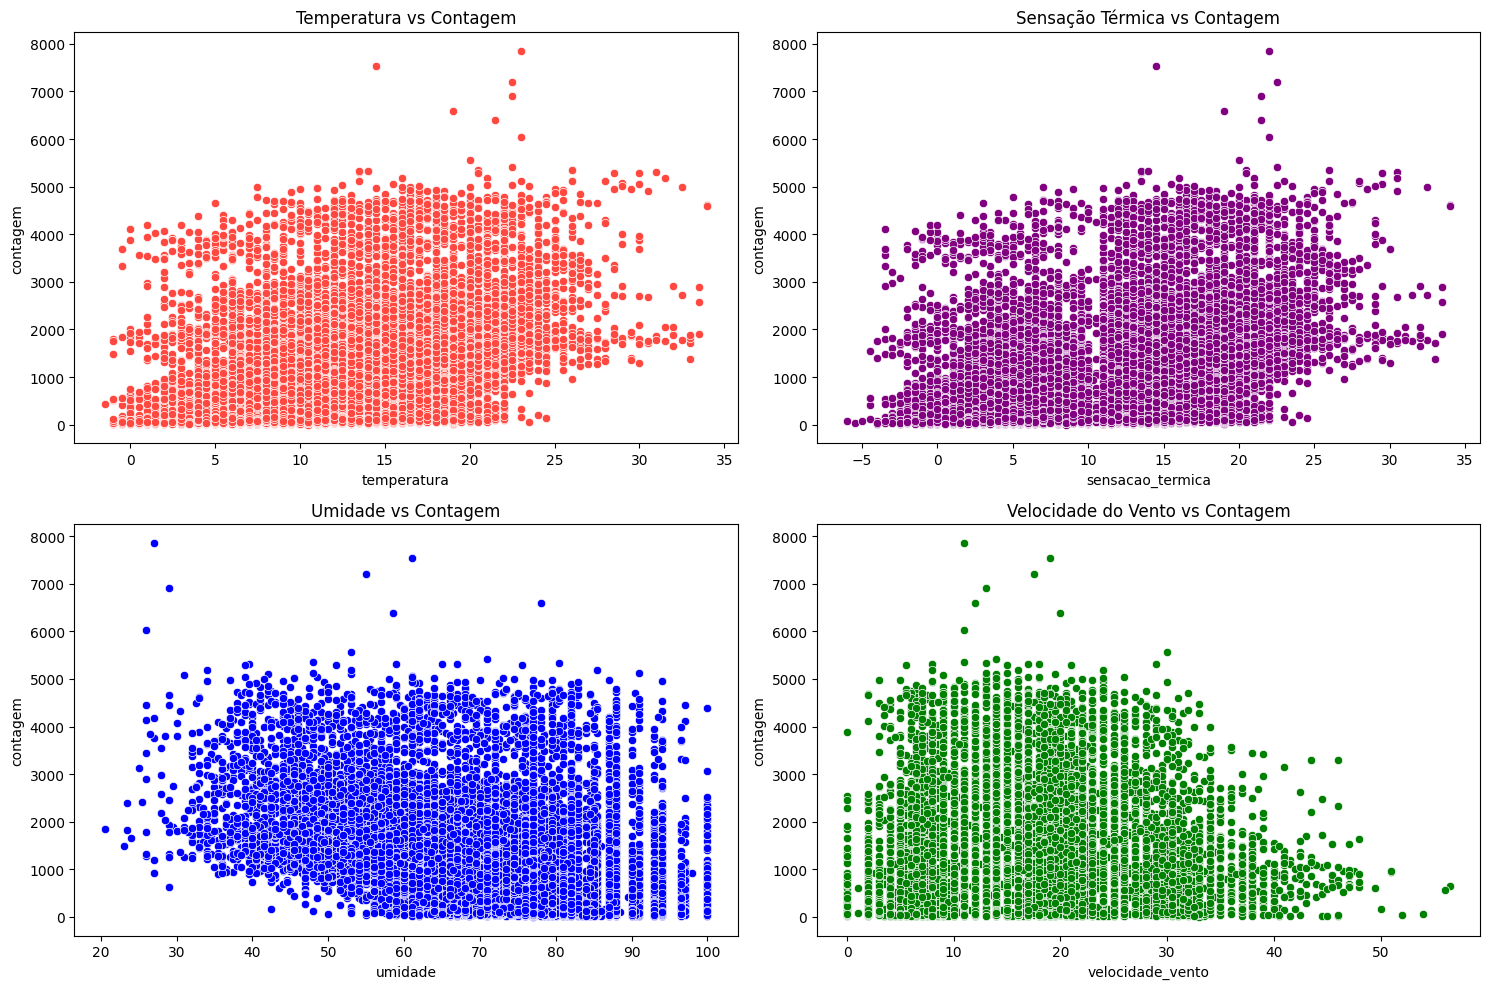

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatterplot for temperatura vs contagem
sns.scatterplot(ax=axes[0, 0], data=df, x='temperatura', y='contagem', color='#FF4940')
axes[0, 0].set_title('Temperatura vs Contagem')

# Scatterplot for sensacao_termica vs contagem
sns.scatterplot(ax=axes[0, 1], data=df, x='sensacao_termica', y='contagem', color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')

# Scatterplot for umidade vs contagem
sns.scatterplot(ax=axes[1, 0], data=df, x='umidade', y='contagem', color='blue')
axes[1, 0].set_title('Umidade vs Contagem')

# Scatterplot for velocidade_vento vs contagem
sns.scatterplot(ax=axes[1, 1], data=df, x='velocidade_vento', y='contagem', color='green')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlação entre Variáveis')

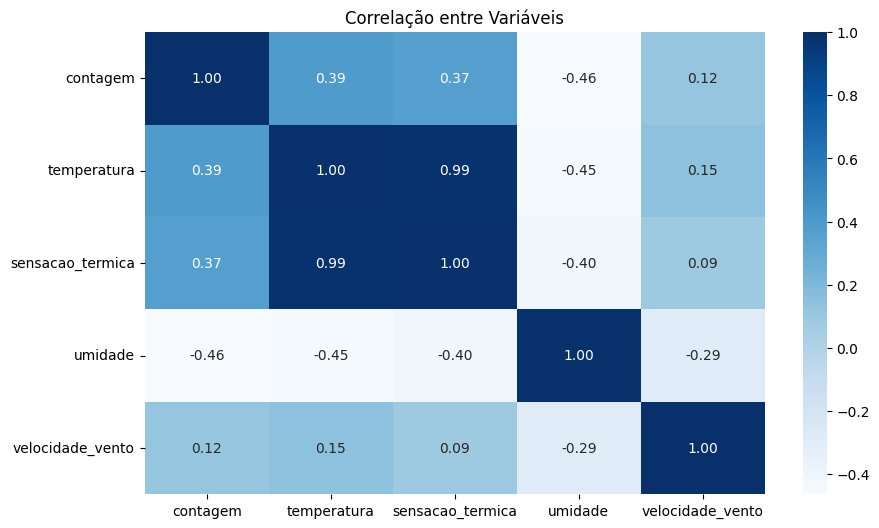

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlação entre Variáveis')

In [11]:
df.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [13]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df[col].unique())
  print('-----------------')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
-----------------
Coluna: feriado
['Não' 'Sim']
-----------------
Coluna: fim_de_semana
['Sim' 'Não']
-----------------
Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
-----------------


C:\Users\foxgh\AppData\Local\Temp\ipykernel_9428\2211471519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='feriado', y='contagem', data=df, palette='Blues')


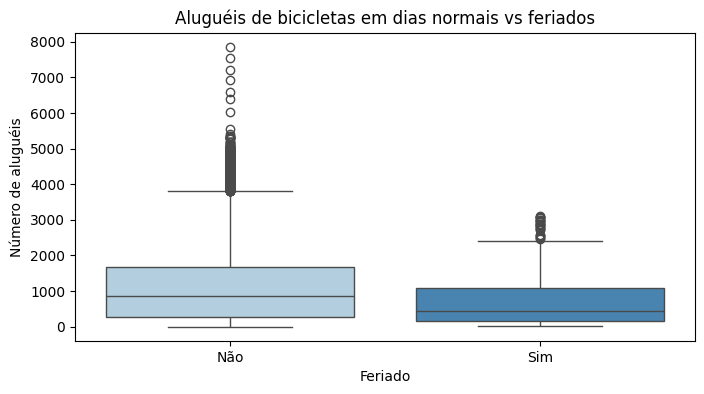

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado', y='contagem', data=df, palette='Blues')
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

In [19]:
mediana_feriado = df.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df.groupby('fim_de_semana')['contagem'].median()

print("Mediana de aluguéis em feriados:")
print(mediana_feriado)
print("\nMediana de aluguéis em fins de semana:")
print(mediana_fim_de_semana)

Mediana de aluguéis em feriados:
feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

Mediana de aluguéis em fins de semana:
fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


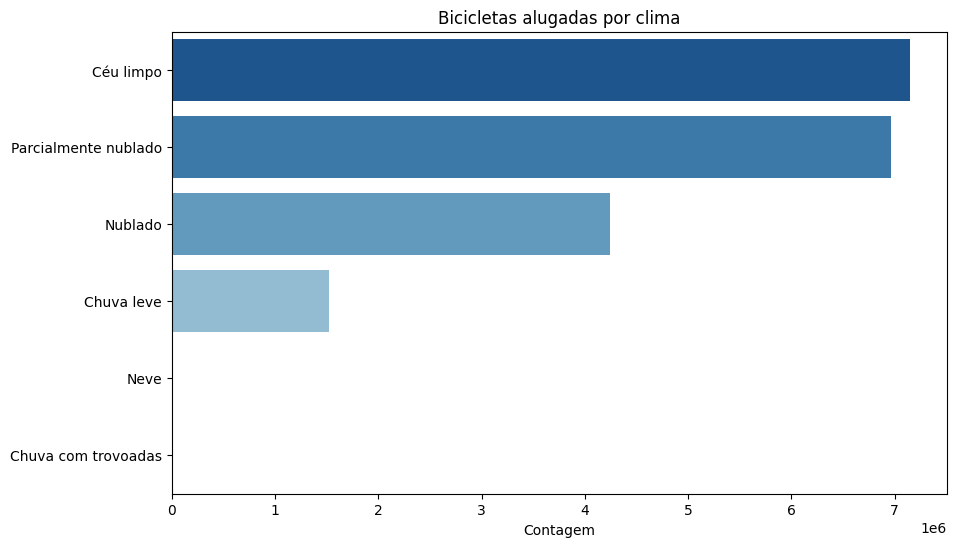

In [21]:

df_clima = df.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [22]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


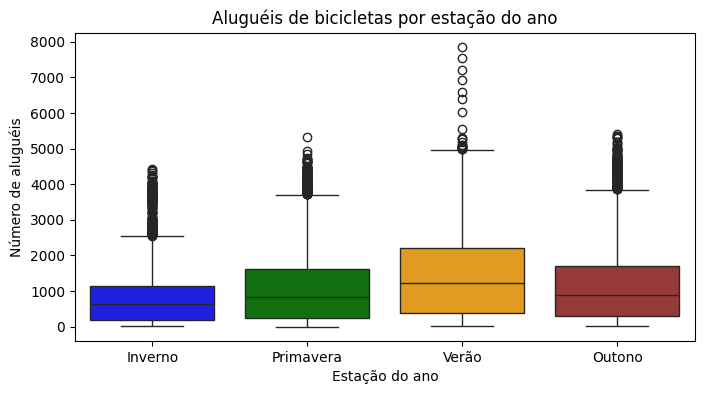

In [23]:

plt.figure(figsize=(8,4))

paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown' , 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Número de aluguéis')
plt.show()
     

In [26]:
print("Mediana de aluguéis por estação do ano:")
print(df.groupby('estacao')['contagem'].median())
print("\nMédia de aluguéis por estação do ano:")
print(df.groupby('estacao')['contagem'].mean())


Mediana de aluguéis por estação do ano:
estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

Média de aluguéis por estação do ano:
estacao
Inverno       821.729099
Outono       1178.954218
Primavera    1103.831589
Verão        1464.465238
Name: contagem, dtype: float64


In [27]:

from scipy.stats import mannwhitneyu

# Filtrando os dados da primavera e outono
primavera = df[df['estacao'] =='Primavera']['contagem']
outono = df[df['estacao'] == 'Outono']['contagem']

# Aplicando o teste de Mann-Whitney
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646297))